<a href="https://colab.research.google.com/github/dexterdev/Machine_Learning_Experiments/blob/master/CNN_fashion_MNIST/main_CNN_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')


#file = files.upload()

import gzip
import numpy as np


def training_images():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def training_labels():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
#file = files.upload()
def testing_images():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images

def testing_labels():
    with gzip.open('/content/gdrive/My Drive/ML_DL/Assignment1/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels

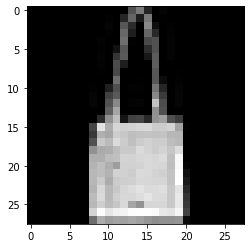

In [20]:
def one_hot(val):
      b = np.zeros((val.size, val.max()+1))
      b[np.arange(val.size),val] = 1
      return b

X_train=training_images()
X_label=one_hot(training_labels())
Y_test=testing_images()
Y_label=one_hot(testing_labels())

#X_train=np.reshape(X_train,(28,28,6000))
#Y_test=np.reshape(Y_test,(28,28,10000))
XX_train=np.zeros((28,28,6000),dtype=np.uint8)
for ii in range(6000):
      XX_train[:,:,ii]=X_train[ii,:,:]
#print(np.shape(X_train))
#print(XX_train[:,:,0])
import matplotlib.pyplot as plt
plt.imshow(XX_train[:,:,200], cmap='gray')


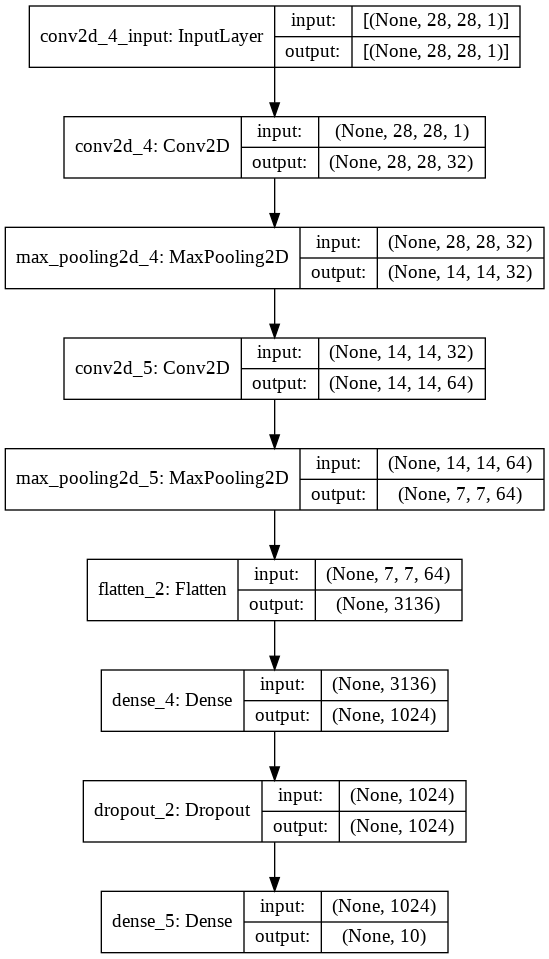

In [21]:
#Required Imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout


classifier = Sequential() 
#Input layer
classifier.add(Conv2D(32, (5, 5), padding="same", input_shape=[ 28, 28, 1]))
#hidden
classifier.add(MaxPool2D((2,2)))
classifier.add(Conv2D(64, (5, 5), padding="same"))
classifier.add(MaxPool2D((2,2)))
classifier.add(Flatten())
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(0.5))
#output
classifier.add(Dense(units = 10, activation = 'softmax'))



#What does the model look like
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file='model.png',show_shapes=True)

In [22]:
opt = keras.optimizers.RMSprop(learning_rate=0.001)
classifier.compile(optimizer = opt, loss = 'categorical_crossentropy')

In [23]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [24]:
X_train = X_train.reshape([-1, 28, 28, 1])
Y_test = Y_test.reshape([-1, 28, 28, 1])
X_train = X_train/255
Y_test = Y_test/255
classifier.fit(X_train, X_label, batch_size = 16, epochs = 25)

Epoch 1/25
3750/3750 [==============================] - 15s 4ms/step - loss: 0.5259
Epoch 2/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3402
Epoch 3/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3319
Epoch 4/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3423
Epoch 5/25
3750/3750 [==============================] - 13s 4ms/step - loss: 0.3593
Epoch 6/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3799
Epoch 7/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.3918
Epoch 8/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4213
Epoch 9/25
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4464
Epoch 10/25
3750/3750 [==============================] - 13s 4ms/step - loss: 0.4578
Epoch 11/25
3750/3750 [==============================] - 14s 4ms/step - loss: 0.4588
Epoch 12/25
3750/3750 [==============================] - 14s 4ms/step - lo

In [25]:
Y_pred = classifier.predict(Y_test)
print(Y_pred[0])

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.6190437e-35 0.0000000e+00 1.5410615e-24 0.0000000e+00 1.0000000e+00]


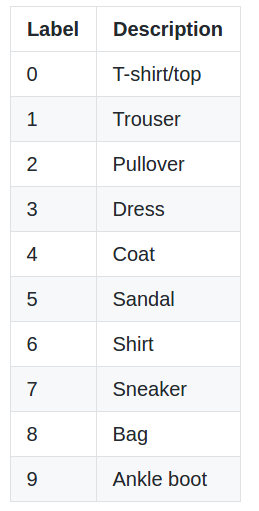

5


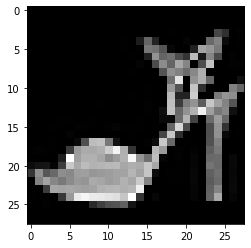

In [26]:
# Check the code: You can change the value of n from 0 to 9999 and verify if the right index for item(label) comes up. 
# See above table for labels of items
n=7754
print(max(range(len(Y_pred[n])), key=Y_pred[n].__getitem__))   
plt.imshow(255*Y_test[n,:,:,-1], cmap='gray')



In [27]:
Y_out_label=np.empty((10000))
Y_real_label=np.empty((10000))
for ii in range(10000):
      Y_out_label[ii]=max(range(len(Y_pred[ii])), key=Y_pred[ii].__getitem__)
      Y_real_label[ii]=max(range(len(Y_label[ii])), key=Y_label[ii].__getitem__)
#Accuracy
diff=np.count_nonzero(Y_real_label-Y_out_label)
print('The overall accuracy of CNN =',100*(1 - diff/10000),'%')

from sklearn.metrics import classification_report, confusion_matrix
#confusion matrix
print('The confusion matrix =')
cm=confusion_matrix(Y_real_label,Y_out_label)
#confusion_matrix(Y_real_label, Y_out_label,  labels=["T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"])

d=np.diag(cm)
print(cm)
print('T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"')
print('The per-class accuracy =',100*(np.max(cm,axis=1)/np.sum(cm,axis=1)))

#print(np.sum(d)/10000)

The overall accuracy of CNN = 90.10000000000001 %
The confusion matrix =
[[831   0  28  14   3   4 110   1   9   0]
 [  0 982   1  10   1   0   3   1   2   0]
 [ 15   1 845   9  53   1  73   0   3   0]
 [ 19  11  13 899  18   0  35   0   3   2]
 [  2   1  88  38 792   2  75   0   2   0]
 [  0   0   0   0   0 981   0  17   0   2]
 [ 98   1  60  21  46   1 760   0  13   0]
 [  0   0   0   0   0  12   0 973   0  15]
 [  2   1   1   2   1   5   2   5 980   1]
 [  0   0   1   0   0   5   0  27   0 967]]
T-shirt/top" ,"Trouser" ,"Pullover" ,"Dress" ,"Coat" ,"Sandal" ,"Shirt" ,"Sneaker" ,"Bag" ,"Ankle boot"
The per-class accuracy = [83.1 98.2 84.5 89.9 79.2 98.1 76.  97.3 98.  96.7]
